1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [63]:
# bin <-> dec

def bin_dec(n, bin=True, bits=16):

    """
    n: The input must be given as a string.
        The input for a binary number must composed of 0s and 1s.
    bin: To convert from binary to decimal, set bin=True. 
        To convert from decimal to binary, set bin=False.
    bits: The number of bits can be specified with the bits parameter,
        in order to have a better readability of the binary number.
    """
    
    if bin == True: # convert from bin to dec
        n = str(n) # convert to a string, if it is not a string
        dec = 0 # set the decimal number to 0
        if n[0] == '1': # check if the leftmost digit is 1
            sign = -1 # set the sign to negative
            n = n[1:] # remove the sign bit
        else:
            sign = 1 # set the sign to positive
        for i in range(len(n)): # loop over the binary string
            dec += int(n[i]) * 2 ** (len(n) - i - 1) 
        return sign * dec # return integer 
    
    else: # convert from dec to bin
        n = int(n) # convert the string to an integer
        binn = '' # set the binary string to an empty string
        while n > 0:
            binn = str(n % 2) + binn # add the remainder to the binary string
            n = n // 2
        binn = binn.zfill(bits) # add 0s in front of the binary number
        return int(binn, bits) # return an integer

print(bin_dec('00011110', bin=True))

# dec <-> hex

def dec_hex(n, dec=True, bits=16):

    """
    n: The input must be given as a string.
        The input for a binary number must composed of 0s and 1s.
    bin: To convert from binary to decimal, set bin=True. 
        To convert from decimal to binary, set bin=False.
    bits: The number of bits can be specified with the bits parameter,
        in order to have a better readability of the binary number.
    """

    hex_digits = "0123456789ABCDEF"
    if dec == True:
        n = int(n)
        hexx = ''
        while n > 0:
            hexx = hex_digits[n % 16] + hexx
            n = n // 16
        hexx = hexx.zfill(bits // 4)
        return hexx
            
    else: # convert from hex to dec
        n = str(n) # convert to a string, if it is not a string
        dec = 0 # set the decimal number to 0
        for i in range(len(n)): # loop over the hexadecimal string
            dec += hex_digits.index(n[i]) * 16 ** (len(n) - i - 1) 
        return int(dec) # return integer
    
print(dec_hex('77', dec=True))

30
004D


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [67]:
def word_to_float(word):
    """
    Convert a 32-bit word to a single precision floating point number.
    """
    # Extract the sign bit, exponent bits, and mantissa bits
    sign = (word >> 31) & 0x1 # shift word 31 bits to the right + bitwise AND with 0x1 = 1 if sign bit is 1, 0 otherwise
    exponent = (word >> 23) & 0xFF # shift word 23 bits to the right + bitwise AND with 0xFF -> isolate 8 bits of exponent
    mantissa = word & 0x7FFFFF # bitwise AND with 0x7FFFFF -> isolate 23 bits of mantissa
    
    # Convert the exponent from biased to actual value
    actual_exponent = exponent - 127 # 127 is the bias for single precision
    
    # Calculate the value of the mantissa as a fraction
    fraction = 1.0 # mantissa is usually normalized, so the first bit is 1
    for i in range(1, 24): # loop over the 23 bits of the mantissa
        bit = (mantissa >> (23 - i)) & 0x1 # shift mantissa 23-i bits to the right + bitwise AND with 0x1 = 1 if bit is 1, 0 otherwise
        fraction += bit * 2 ** (-i) # add the value of the bit to the fraction
    
    # Calculate the value of the floating point number
    value = (-1) ** sign * fraction * 2 ** actual_exponent 
    
    return value


word = 0x3f13c468
print(word_to_float(word))

0.5772156715393066


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [6]:
a = 1.1 #overflow
b = 1.1 #underflow
try: 
    for i in range(1, 1000):
        a = a**i
        print('a=',a)
except OverflowError as e:
    print("\nOverflow error happened")
    print(f"{e}, {e.__class__}\n")

try:
    for i in range(1, 1000):
        b = b**(-i)
        print('b=',b)
except ZeroDivisionError as e:
    print("\nUnderflow error happened")
    print(f"{e}, {e.__class__}")

a= 1.1
a= 1.2100000000000002
a= 1.7715610000000008
a= 9.84973267580763
a= 92709.06881783094
a= 6.349409156065518e+29
a= 4.160381892062108e+208

Overflow error happened
(34, 'Result too large'), <class 'OverflowError'>

b= 0.9090909090909091
b= 1.2100000000000002
b= 0.5644739300537772
b= 9.849732675807626
b= 1.0786431281765497e-05
b= 6.349409156065449e+29
b= 2.4036254986784937e-209


OverflowError: (34, 'Result too large')

4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [36]:
import math as m
c = 5
i = 0
d = _
print('c=', format(c,'.30f'))
print('d', d)
while True:
    d = a+m.exp(-i)
    i += 1
    if c == d:
        break

print(f"equality at {i}th iteration")
print('d=', format(d,'.30f'))

c= 5.000000000000000000000000000000
d 
equality at 37th iteration
d= 5.000000000000000000000000000000


In [35]:
import math as m
c = 5
i = 0
d = _
print('c=', format(c,'.30f'))
print('d', d)
for i in range(1, 38):
    d = a+m.exp(-i)
    # i += 1
    if c == d:
        break

print(f"equality at {i}th iteration")
print(format(d,'.30f'))

c= 5.000000000000000000000000000000
d 
equality at 36th iteration
5.000000000000000000000000000000


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [9]:
import math as m

# a)
a = 0.001
b = 1000
c = 0.001

def quad(a, b, c):
    x1, x2 = (-b + m.sqrt(b**2 - 4*a*c))/(2*a), (-b - m.sqrt(b**2 - 4*a*c))/(2*a)
    return x1, x2

print(quad(a, b, c))

# b)
x11, x22 = quad(a, b, c)[0] * (-b - m.sqrt(b**2 - 4*a*c)), quad(a, b, c)[1] * (-b + m.sqrt(b**2 - 4*a*c))
print("(%.16f, %.16f)" % (x11, x22))

# c)
import math

def quadratic_roots(a, b, c):
    """
    This function computes the roots of a quadratic equation accurately in all cases.
    It takes three arguments: a, b, and c, which are coefficients of the quadratic equation.
    """
    discriminant = b**2 - 4*a*c
    
    if discriminant > 0:
        root1 = (-b + math.sqrt(discriminant)) / (2*a)
        root2 = (-b - math.sqrt(discriminant)) / (2*a)
        return root1, root2
    
    elif discriminant == 0:
        root = -b / (2*a)
        return root
    
    else:
        real_part = -b / (2*a)
        imaginary_part = math.sqrt(-discriminant) / (2*a)
        return complex(real_part, imaginary_part), complex(real_part, -imaginary_part)
    
quadratic_roots(a, b, c)

(-9.999894245993346e-07, -999999.999999)
(0.0019999788491967, 0.0019999788491967)


(-9.999894245993346e-07, -999999.999999)

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [100]:
import matplotlib.pyplot as plt
true_value = 1

def f(x):
    return x**2-x

# a)
print('a)') 
def der_def(f, x, h):
    return (f(x+h) - f(x))/h
print(format(der_def(f, 1, 10e-2), '.30f'))

# b)
h_list = [10e-04, 10e-06, 10e-08, 10e-10, 10e-12, 10e-14, 10e-16, 10e-18]
print('\nb)')
for i in h_list:
    print(format(der_def(f, 1, i), '.30f'))
print('\nerror')

acc_list = []
for i in h_list:
    acc = abs(der_def(f, 1, i) - true_value)*100
    acc_list.append(acc)
    print(i,':', acc, '%')

a)
1.100000000000000976996261670138

b)
1.000999999999807599238010880072
1.000010000007378607733699027449
1.000000100503939393092878162861
1.000000082740370999090373516083
1.000000082740370999090373516083
0.999200722162640886381268501282
1.110223024625156540423631668091
0.000000000000000000000000000000

error
0.001 : 0.09999999998075992 %
1e-05 : 0.0010000007378607734 %
1e-07 : 1.0050393939309288e-05 %
1e-09 : 8.274037099909037e-06 %
1e-11 : 8.274037099909037e-06 %
1e-13 : 0.07992778373591136 %
1e-15 : 11.022302462515654 %
1e-17 : 100.0 %


7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [75]:
import math

# a)
def semi(x):
    return (1-x**2)**(1/2)

def rie_int(f, N):
    h = 2/N
    sum = 0
    for i in range(1, N+1):
        sum += f(i*(h/2))*h
    return sum

print(rie_int(semi, 100))
print('error is', abs(rie_int(semi, 100) - 1.5707963267948966)*100, '%')

1.5602085158895234
error is 1.0587810905373196 %


1.5691342555492505

Total time: 0.00e+00 sec
Res: 0.0	Err: 1.0e+02%
Tru: 1.5707963267948966	N: 10^0

Total time: 0.00e+00 sec
Res: 1.5185244144417758	Err: 3.3e+00%
Tru: 1.5707963267948966	N: 10^1

Total time: 0.00e+00 sec
Res: 1.5691342555492505	Err: 1.1e-01%
Tru: 1.5707963267948966	N: 10^2

Total time: 9.99e-04 sec
Res: 1.570743738501071	Err: 3.3e-03%
Tru: 1.5707963267948966	N: 10^3

Total time: 4.03e-03 sec
Res: 1.570794663715291	Err: 1.1e-04%
Tru: 1.5707963267948966	N: 10^4

Total time: 6.60e-02 sec
Res: 1.5707962742034223	Err: 3.3e-06%
Tru: 1.5707963267948966	N: 10^5

Total time: 7.97e-01 sec
Res: 1.5707963251317274	Err: 1.1e-07%
Tru: 1.5707963267948966	N: 10^6

Total time: 5.47e+00 sec
Res: 1.5707963267423612	Err: 3.3e-09%
Tru: 1.5707963267948966	N: 10^7

Total time: 6.58e+01 sec
Res: 1.570796326793284	Err: 1.0e-10%
Tru: 1.5707963267948966	N: 10^8



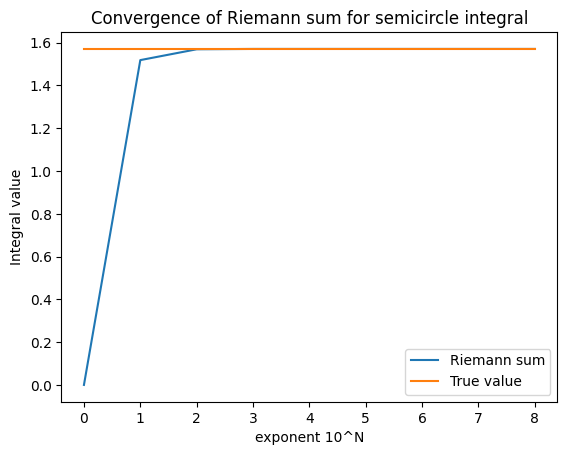

In [128]:
# a + b)

import math
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

def func(x):
    return (1-x**2)**(0.5)

def timer(func):
    def func_wrapper(*args, **kwargs):
        t_s = time.time()
        ret = func(*args, **kwargs)
        t_total = time.time() - t_s
        print('Total time: %.2e sec' % t_total)
        return ret
    return func_wrapper

@timer
def integrate(start, stop, N, func):
    dx = (stop-start)/N
    integral=0
    for i in range(N):
        x = start + dx*i
        integral += func(x)*dx
    return integral

S = []

def perc_error(i, N):
    pi_half = integrate(-1, 1, N, func)
    S.append(pi_half)
    perc = abs(pi_half- math.pi/2)/(math.pi/2)*100
    print('Res: ', pi_half, '\tErr: %.1e' % perc, '%', '\nTru: ', math.pi/2, '\tN: 10^', i, '\n', sep='')

subdiv=[10**i for i in range(0, 9)]
#subdiv.append(2*100000000)
for i, n in enumerate(subdiv):
    perc_error(i, n)


plt.figure()
plt.plot(S, label="Riemann sum")
plt.plot([np.pi/2] * len(S), label="True value")
plt.legend()
plt.xlabel("exponent 10^N")
plt.ylabel("Integral value")
plt.xticks(range(len(subdiv)), [i for i in range(0, 9)])

# set x-axis ticks to be in scientific notation
plt.gca().xaxis.set_major_formatter(ScalarFormatter())

plt.title("Convergence of Riemann sum for semicircle integral")
plt.show()